<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/6.1_Weimberg_pathway_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pysces
import pysces
import pandas as pd
import matplotlib as plt

# The Weimberg pathway for d-xylose conversion in C. crescentus

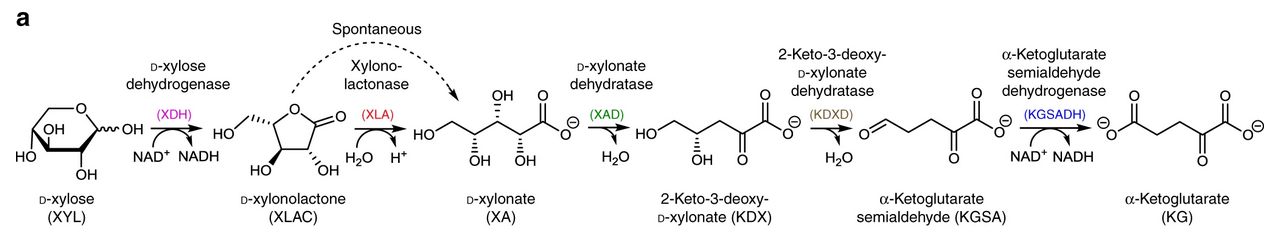


### Download the PySCeS format model from JWS Online

* Point your browser to https://jjj.bio.vu.nl
* Filter the database on model name: "Shen"
* Click the download dropdown menu for "Shen2" and select "PySCeS"
* Load the PySCeS model


In [ ]:
model_description = '''

'''

model = pysces.model('my_model', loader='string', fString=model_description)

## Isolate the xylose dehydrogenase reaction "XDH" from the model

* The easiest way to do this is to edit the model in PySCeS and set the enzyme concentrations of the other enzymes to 0 (keep the XDH enzyme concentration at its default value of 2.5 ug/ml). The enzyme concentrations are denoted with "E." with . a, b, ,c, d, or x. Check in the respective rate equations which E. values should be set to 0.

* Simulate the ODEs for a time period 0 to 100, and plot the XYL and XLAC variables against time.

* Check de units for XYL in the simulation; VmXDH is given in U/mg, and E_XDH is given in ug/ml, t is given in minutes.


## Get the experimental data

* Go to https://fairdomhub.org and search for "Caulobacter crescentus", follow the link to "Caulobacter crescentus Weimberg pathway". Double click the "Progress curve analysis data" (under the "Progres curve XDH", and "Progres curves" sections). Download the "progress curve analysis data.xlsx" file.

* Import the data from the second sheet in the excel file and plot the XYL and XLAC concentrations for the first 90 minutes.

* Combine the experimental data and the model simulation plots.

In [ ]:
#load the data
progress_curve_data = pd.read_excel('progress curve analysis data.xlsx', sheet_name='SEDML')
#filter the data
progress_curve_data = progress_curve_data[['time','XYL','XLAC']].dropna().drop(0)
progress_curve_data

## Simulate the effect of the two product inhibition terms

* Eliminate the effect of NADH, or XLAC, or both on the XDH rate equation. You can do this by changing the rate equation or by changing parameter values.

* Plot the four model simulations together with the experimental data.

* Which of the products has the biggest effect on the conversion rate of XYL to XLAC?

## Effect of Xylonolactonase (XLA)

* Simulate the complete model (use the default enzyme concentrations) and plot the intermediates KDX, KG, KGSA, NAD, XA, XLAC, XYL against time, for a time period of 500 minutes.

* Set the enzyme concentration of the XLA reaction to 0, and plot the intermediate concentrations again.

* Plot the KGSA concentration for both simulations together, is there a big difference in the formation rate of this product?

* Plot the XLAC concentration for both simulations together. Explain why "deleting" the XLA has only little effect on the final product formation rate.

* Repeat these steps at a 10x higher concentration of all enzymes.


## Effect of NAD recycling

* Which reaction catalyses the NAD recycling in the system, and why is it not active in the default Shen2 model?

* Switch the recycling system on at a sufficiently high activity that the NAD concentration remains essentially constant during KG production.

* Compare the KG production rate with and without NAD recycling.

## Pathway optimisation

* The total protein concentration in the system is equal to Et = Ea + Eb + Ec + Ed + Ex. While keeping Et constant, redistribute protein over the enzymes (i.e. you can change Ea Eb Ec Ed and Ex but the sum must remain constant), and try to minimize the time it takes for maximal conversion of XYL to KG. Do the same optimisation in absence or presence of NAD recycling.
